## Лабароторная работа 2
### Решение краевых задач методом разностных аппроксимаций

In [1]:
import numpy as np
from matplotlib import pyplot as plt


def direct_way(a, b, c, f, n):
    alpha, beta = np.zeros(n), np.zeros(n)
    for i in range(1, n):
        alpha[i] = b[i] / (c[i] - a[i] * alpha[i-1])
        beta[i] = (f[i] + a[i] * beta[i-1]) / (c[i] - a[i] * alpha[i-1])
    return alpha, beta


def reverse_way(a, b, c, f, n):
    y = np.zeros(n + 1)
    alpha, beta = direct_way(a, b, c, f, n)
    for i in range(n - 1, 0, -1):
        y[i] = alpha[i] * y[i+1] + beta[i]
    return y


def solve(x, n, opt=None, compl=False):
    step = (x[n] - x[0]) / n
    if compl:
            a = [np.sin(opt * x[i]) for i in range(n)]
            b = [np.sin(opt * x[i]) for i in range(n)]
            c = [2 * np.sin(opt * x[i])
                - (1 + np.cos(opt * x[i]) 
                * x[i]**2) * step**2 for i in range(n)]
    else:          
        if opt is not None:
            u = np.sin(opt)
            t = np.cos(opt)
        else:
            u = 1
            t = 1
        a, b = np.tile(u, n), np.tile(u, n)
        c = [2 * u - (1 + t * x[i]**2) * step**2 for i in range(n)]
    f = np.tile(step**2, n)
    return reverse_way(a, b, c, f, n)
    

def draw(x, y, label=None, ylabel='y'):
    plt.plot(x, y, label=label)
    if label is not None:
        plt.legend()
    plt.title('Approximate solution of the differential equation')
    plt.xlabel('x')
    plt.ylabel(ylabel)
    plt.grid(True)
    return plt

Начальные данные

In [2]:
x0, xn = -1, 1
n_row = [10, 20, 60, 200, 1000]
option = 13

Основное задание

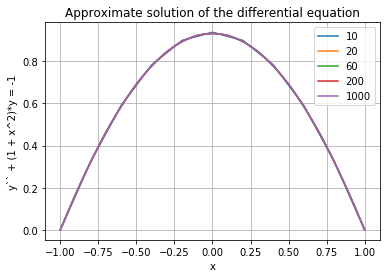

In [3]:
for ni in n_row:
    hi = (xn - x0) / ni
    xi = np.arange(x0, xn + hi, hi)
    draw(xi, solve(xi, ni), ni, 'y`` + (1 + x^2)*y = -1')
plt.show()

Задание по вариантам

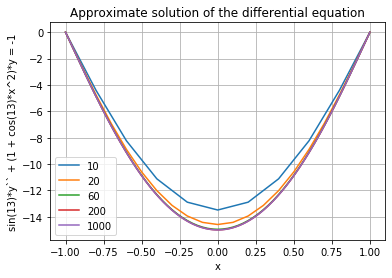

In [4]:
for ni in n_row:
    hi = (xn - x0) / ni
    xi = np.arange(x0, xn + hi, hi)
    draw(xi, solve(xi, ni, option), ni, f'sin({option})*y`` + (1 + cos({option})*x^2)*y = -1')
plt.show()

Усложненная версия

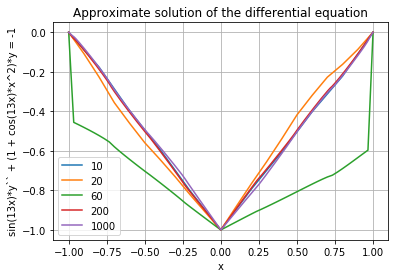

In [5]:
for ni in n_row:
    hi = (xn - x0) / ni
    xi = np.arange(x0, xn + hi, hi)
    draw(xi, solve(xi, ni, option, compl=True), ni, f'sin({option}x)*y`` + (1 + cos({option}x)*x^2)*y = -1')
plt.show()
